In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')

In [3]:
# like to predict the price of a used car depending on its specifications
# the first potential regressor is Brand
# the second relavant variable is Mileage
# the third variables is EngineV
# the final is Year of production

raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
# all data sets were clean before being presented
# easy way to check the data and spot problem is to use the descriptive statistics
# it only for numerical variables

raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
# use the argment it will have all data
# and it has the categorical too
# with the result it has the different count, so it means there are some missing values
# with the Model it can know there are 312 unique, so there are 312 dummies
# the freq can see Registration are 3947 entries for yes, it almost all of them, so it looks like this value won't be useful

raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Clean Data

In [6]:
# a lot of information from Model could be engineered from brand, year and engine volume so we won't be losing too much variability

data = raw_data.drop(['Model'], axis = 1)

In [7]:
# it looks like the Brand, Body, Mileage, Engine Type, Registration and Year seem have no missing values
# given the total number of observation is 4345

data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
# it shows the dataframe true stands for a missing value
# false doesn't have missing value

data.isnull()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4340,False,False,False,False,False,False,False,False
4341,False,False,False,False,False,False,False,False
4342,False,False,False,False,False,False,False,False
4343,False,False,False,False,True,False,False,False


In [9]:
# using the .sum() can sum all the missing and give us the number of null observation
# if you are removing < 5% of the observations, you are free toy just remove all that have missing value

data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [10]:
# it will be dropping observations not columns
# so the axis = 0

data_no_mv = data.dropna(axis = 0)

In [11]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


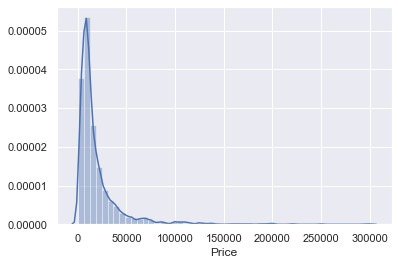

In [12]:
# for optimal results, we would be looking for a normal distribution
# the Price has an exponential one
# with the mean, 25%, 50% ,75%, max and min
# it can know the Price have a few outliers
# the outliers means the observations that lie on abnormal distance from other observations in the data
# this outliers will affect the regression
# one way to deal with the outliers seemlessly is to remove top 1% of observations

sns.distplot(data_no_mv['Price'])

In [13]:
# want to get the 99 percentile and keep the data below it
# this is one way to eliminate outliers

q = data_no_mv['Price'].quantile(0.99)

In [14]:
data_1 = data_no_mv[data_no_mv['Price'] < q]

In [15]:
# the max value is around the 130000 or the 99 percentile

data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


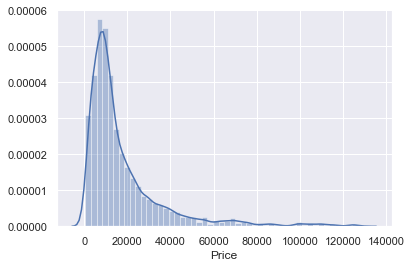

In [16]:
# it is still distributed in the same way
# but the outliers is less

sns.distplot(data_1['Price'])

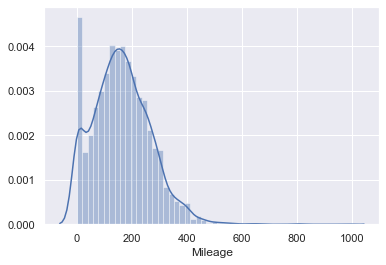

In [17]:
# it is like the Price
# so keeping only the data lower than 99 percentile

sns.distplot(data_no_mv['Mileage'])

In [18]:
q = data_1['Mileage'].quantile(0.99)

In [19]:
data_2 = data_1[data_1['Mileage'] < q]

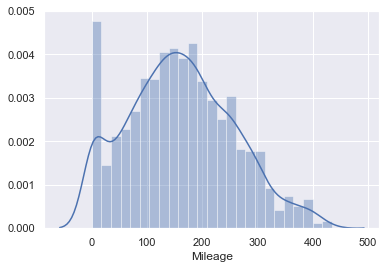

In [20]:
sns.distplot(data_2['Mileage'])

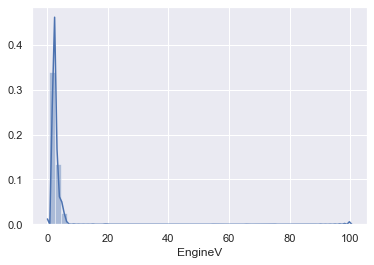

In [21]:
# the EngineV also have the 66, 75, 90, 99.99
# this values are not usual values
# google with EngineV
# an interval where EngineV should normally fall is 0.6 to 6.5
# therefore the 66, 75, 90, 99.99 so on value are incorrect entries
# a common way to label missing values is by assigning 99.99
# but in this way is hard for user of the data to distinguish from the true values

sns.distplot(data_no_mv['EngineV'])

In [22]:
data_3 = data_2[data_2['EngineV'] < 6.5]

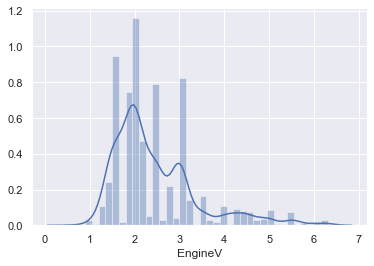

In [23]:
sns.distplot(data_3['EngineV'])

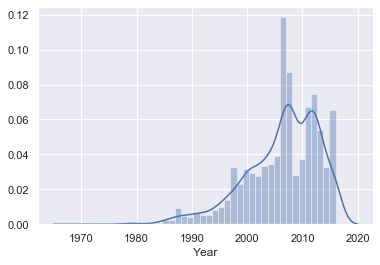

In [24]:
# most car are newer

sns.distplot(data_no_mv['Year'])

In [25]:
q = data_3['Year'].quantile(0.01)

In [26]:
data_4 = data_3[data_3['Year'] > q]

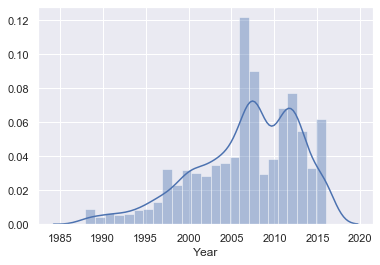

In [27]:
sns.distplot(data_4['Year'])

In [28]:
data_cleaned = data_4.reset_index(drop = True)

In [29]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Check OLS assumptions

1. Linearity.
2. No endogeneity.
3. Normality and Homoscedasticity.
4. No Autocorrelation.
5. Multicollinearity.

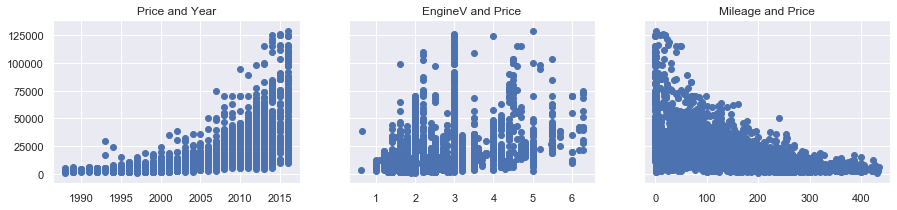

In [30]:
# the categorical ones will be included as dummies so don't need to worry about when checking the assumptions
# the Price, Year, EngineV, Mileage are likely to be more challenging and cause us more problems
# check the linearity
# this three scatter plot can spot patterns but definitely not linear ones
# so in this case, we should not run regression
# we should first transform one or more variables
# log transformations are especially useful when facing exponential relationships

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('EngineV and Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

plt.show()

In [31]:
log_price = np.log(data_cleaned['Price'])

In [32]:
data_cleaned['log_price'] = log_price

In [33]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


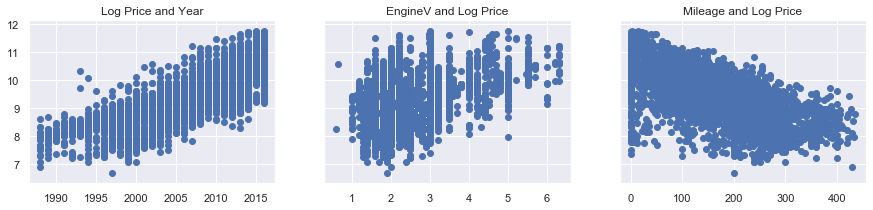

In [34]:
# with using the log transformation
# it can see the linear pattern right now
# so the lines fit the data so much better

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))

ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('EngineV and Log Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Mileage and Log Price')

plt.show()

In [35]:
# so keep the log price
# drop the original price

data_cleaned = data_cleaned.drop(['Price'], axis = 1)

In [36]:
# it is logical that Year and Mileage are going to be correlated
# therefore we have to expect some degree of multicollinearity in the data
# one of the best ways to check for multicollinearity is through VIF(variance inflation factor)
# VIF produces a measure which estimates how much larger the square root of the standard error of an estimate is, compare to a situation where variable was completely uncorrelated with the ohter predictors

data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [38]:
# when vif is 1, it means no multicollinearity
# 1 < vif <5, it means perfectly okay
# 5,6  < vif, it means unacceptable
# it seems the Year is too correlated with the other variabels

vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [39]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

## Create dummy variables

In [40]:
# if we have N categories for a feature, we have to create N-1 dummies
# if we include a separate dummy variable for each category, we will introduce multicollinearity to the regression

data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [41]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Rearrange

In [42]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[cols]

In [45]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
